In [2]:
import cv2 as cv
import numpy as np

In [3]:
img = cv.imread('resources/stefanie-knight-heating-up-12.jpg')

cv.imshow('hey', img)

cv.waitKey(0)

-1

In [6]:
def rescaleFrame(frame, scale = 0.66):
    width  = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
#     frame /=2.0
    
    return cv.resize(frame, (width, height), interpolation = cv.INTER_AREA)

In [90]:
capture = cv.VideoCapture('resources/blacked.mp4')
while True:
    isTrue, frame = capture.read()
    if isTrue == False:
        break
    frame = rescaleFrame(frame)
    cv.imshow('black', frame)
    
    if cv.waitKey(15) & 0xFF == ord('d'):
        break
    
capture.release()
cv.destroyAllWindows()

In [30]:
draw = np.zeros((200, 320, 3), dtype='uint8')

draw[:] = 0, 255, 0 # paint it green

cv.rectangle(draw, 
             (10, 10), 
             (100, 100),
             (255, 0, 0), 
             thickness=-1
            )

cv.circle(
    draw, 
    (160, 100), 
    40, 
    (0, 0, 255), 
    thickness = 3
)

cv.line(
    draw, 
    (0, 0), 
    (160, 100), 
    (0, 255, 255), 
    thickness = 3
)

cv.putText(draw,
           'Hello', 
           (100, 100), 
           cv.FONT_HERSHEY_TRIPLEX, 
           1.0, 
           (255, 255, 255), 
           thickness = 2
          )


cv.imshow('draw', draw)
cv.waitKey(0)

-1

In [56]:
from random import randint
def bla(h=80, w=50):
    canvas = np.zeros((w, h, 3), dtype='uint8')
    for i in range(w):
        for j in range(h):
            for k in range(3):
                canvas[i,j,k] = randint(0, 255)
#     print (canvas)
    return canvas

In [57]:
for _ in range(100):
    rancan = bla()
#     print (rancan)
    cv.imshow('rancan', rancan)
    cv.waitKey(15)

In [7]:
img = rescaleFrame(img, .5)

In [17]:
# convert to grayscale

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('gray', gray)
cv.waitKey(0)

-1

In [31]:
# blur an image

blur = cv.GaussianBlur(draw, 
                       (5, 5), 
                       cv.BORDER_DEFAULT)

cv.imshow('blur', blur)
cv.waitKey(0)

-1

In [32]:
# edge cascade

canny = cv.Canny(blur, 125, 125)

cv.imshow('canny', canny)
cv.waitKey(0)

-1

In [33]:
#dilating the image

dilated = cv.dilate(canny, (3, 3), iterations=1)

cv.imshow('dilated', dilated)
cv.waitKey(0)

-1

In [37]:
# resize
resized = cv.resize(draw, (600, 400))

cv.imshow('resized', resized)
cv.waitKey(0)

-1

In [39]:
# cropping
cropped = draw[0:160, 0: 200]

cv.imshow('cropped', cropped)
cv.waitKey(0)

-1

In [62]:
d2 = draw

cv.imshow('d2', d2)
cv.waitKey(0)

-1

In [ ]:
# translate
def translate(img, x, y):
    transmat = np.float32

In [50]:
# rotate
def rotate(img, angle, rotPoint=None):
    height, width = img.shape[:2]
    
    if rotPoint == None:
        rotPoint = (width//2, height//2)
    
    rotmat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    
    return cv.warpAffine(img, rotmat, (width, height))

In [51]:
rotated = rotate(draw, 45)

cv.imshow('rotated', rotated)
cv.waitKey(0)

-1

In [53]:
# flip 
flipped = cv.flip(draw,
#                   -1 # for vertical and horizontal
#                   0  # for vertical
                  1  # for horizontal
                 )

cv.imshow('flipped', flipped)
cv.waitKey(0)

-1

In [54]:
# contours

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

print(len(contours))

27


In [56]:
# thresholding
ret, thresh = cv.threshold(img, 125, 255, cv.THRESH_BINARY)

cv.imshow('thresh', thresh)
cv.waitKey(0)

-1

In [63]:
d2 = cv.drawContours(d2, contours, -1, (0, 0, 0), 1)

cv.imshow('d2', d2)
cv.waitKey(0)

-1

In [64]:
# BGR to HSV

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

cv.imshow('hsv', hsv)
cv.waitKey(0)

-1

In [65]:
# BGR to LAB

LAB = cv.cvtColor(img, cv.COLOR_BGR2LAB)

cv.imshow('LAB', LAB)
cv.waitKey(0)

-1

In [73]:
import matplotlib.pyplot as plt

In [74]:
def show(img):
    plt.imshow(img)
    plt.show()

In [15]:
def show(img):
    
    cv.imshow('img', img)
    cv.waitKey(0)

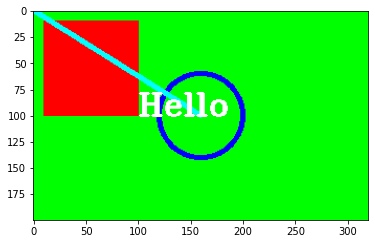

In [78]:
show(draw)

In [80]:
# BGR to RGB

RGB = cv.cvtColor(draw, cv.COLOR_BGR2RGB)

cv.imshow('RGB', RGB)
cv.waitKey(0)

-1

In [96]:
# median blur
blur = cv.medianBlur(img, 3)

show(blur)

In [27]:
for i in range(1, 20, 2):
    con = cv.medianBlur(img, i)
    cv.imshow('img', con)
    cv.waitKey(25)

cv.waitKey(0)

-1

In [98]:
bla(img)

In [13]:
# bilateral image blur

for i in range(1, 20, 2):
    con = cv.bilateralFilter(img, 5, 15, i)
    cv.imshow('img', con)
    cv.waitKey(25)

cv.waitKey(0)

-1

In [19]:
# threshold
thresholh, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

show(thresh)

In [24]:
for i in range(2, 255, 2):
    threshold, thresh = cv.threshold(gray, i, 255, cv.THRESH_BINARY_INV)
    cv.imshow('img', thresh)
    cv.waitKey(25)

cv.waitKey(0)

-1

In [52]:
def style1(img):
    canny = cv.Canny(img, 99, 99)
    contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    blur = cv.medianBlur(img, 3)
    d2 = cv.drawContours(img, contours, -1, (0, 0, 0), 1)
    
    show(d2)
    
style1(img)
    
    

In [49]:
for i in range(3, 255, 2):
    con = cv.Canny(img, i, i)
    cv.imshow('img', con)
    cv.waitKey(25)

cv.waitKey(0)

-1

In [26]:
# adaptive thresholding

# finds optimal thresholding by itself

athresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 0)

show(athresh)

In [61]:
for i in range(3, 25, 2):
    con = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 13, 3)
    cv.imshow('img', con)
    cv.waitKey(500)

cv.waitKey(0)

-1

In [62]:
# laplacian

lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
show(lap)